In [1]:
# ==========================================
# 1. INSTALL LIBRARY & LOAD DATA
# ==========================================
# Install library kagglehub (jika belum ada)
!pip install -q kagglehub

import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("⏳ Sedang mendownload dan memuat dataset dari Kaggle (File size agak besar, mohon tunggu)...")

# Set nama file spesifik di dalam dataset
file_path = "vehicles.csv"

# Load dataset menggunakan Kaggle Hub
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "austinreese/craigslist-carstrucks-data",
  file_path,
)

print("✅ Dataset Berhasil Dimuat ke variable 'df'!")
print("="*40)

# ==========================================
# 2. SCRIPT ANALISIS KUALITAS DATA
# (Untuk Bukti Proposal & Notebook Progress)
# ==========================================

def analyze_dataframe(df):
    # 1. CEK DIMENSI
    rows, cols = df.shape
    print(f"1. UKURAN DATASET")
    print(f"   - Jumlah Baris (Sampel): {rows:,}") # Format ribuan
    print(f"   - Jumlah Kolom (Fitur) : {cols}")

    if cols < 5:
        print("   ⚠️ PERINGATAN: Fitur terlalu sedikit (< 5).")
    else:
        print("   ✅ Jumlah fitur memenuhi syarat minimal (Minimal 5-8).")
    print("-" * 40)

    # 2. CEK MISSING VALUES (Tujuan: Mencari data 'kotor')
    print(f"2. ANALISIS MISSING VALUE")
    missing = df.isnull().sum()
    missing_percent = (df.isnull().sum() / len(df)) * 100
    missing_data = pd.DataFrame({'Total Hilang': missing, 'Persentase (%)': missing_percent})
    missing_data = missing_data[missing_data['Total Hilang'] > 0].sort_values(by='Persentase (%)', ascending=False)

    if not missing_data.empty:
        print(f"   ✅ DITEMUKAN {len(missing_data)} kolom dengan missing value.")
        print("\n   Top 10 Kolom Paling 'Kotor' (Bagus untuk Laporan):")
        display(missing_data.head(10))
    else:
        print("   ❌ Dataset Bersih (Tidak disarankan).")
    print("-" * 40)

    # 3. CEK DUPLIKASI
    duplicates = df.duplicated().sum()
    print(f"3. CEK DUPLIKASI")
    print(f"   - Jumlah baris duplikat: {duplicates:,}")
    print("-" * 40)

    # 4. CEK OUTLIER PADA HARGA (Contoh spesifik dataset mobil)
    if 'price' in df.columns:
        print(f"4. CEK OUTLIER KOLOM 'PRICE'")
        print(f"   - Harga Minimum: {df['price'].min()}")
        print(f"   - Harga Maksimum: {df['price'].max()}")
        print("   (Jika ada harga $0 atau milyaran tidak wajar, ini bukti data raw/kotor)")

# Jalankan Fungsi Analisis
analyze_dataframe(df)

# Tampilkan 5 data teratas
print("\nContoh 5 Data Teratas:")
display(df.head())

⏳ Sedang mendownload dan memuat dataset dari Kaggle (File size agak besar, mohon tunggu)...


/tmp/ipython-input-382287695.py:20: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 262M/262M [00:02<00:00, 118MB/s]

Extracting zip of vehicles.csv...


✅ Dataset Berhasil Dimuat ke variable 'df'!
1. UKURAN DATASET
   - Jumlah Baris (Sampel): 426,880
   - Jumlah Kolom (Fitur) : 26
   ✅ Jumlah fitur memenuhi syarat minimal (Minimal 5-8).
----------------------------------------
2. ANALISIS MISSING VALUE
   ✅ DITEMUKAN 20 kolom dengan missing value.

   Top 10 Kolom Paling 'Kotor' (Bagus untuk Laporan):


,Total Hilang,Persentase (%)
county,426880,100.000000
size,306361,71.767476
cylinders,177678,41.622470
condition,174104,40.785232
VIN,161042,37.725356
drive,130567,30.586347
paint_color,130203,30.501078
type,92858,21.752717
manufacturer,17646,4.133714
title_status,8242,1.930753


----------------------------------------
3. CEK DUPLIKASI
   - Jumlah baris duplikat: 0
----------------------------------------
4. CEK OUTLIER KOLOM 'PRICE'
   - Harga Minimum: 0
   - Harga Maksimum: 3736928711
   (Jika ada harga $0 atau milyaran tidak wajar, ini bukti data raw/kotor)

Contoh 5 Data Teratas:


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


⏳ Sedang memuat dataset...
Using Colab cache for faster access to the 'craigslist-carstrucks-data' dataset.
Path dataset: /kaggle/input/craigslist-carstrucks-data
✅ Dataset berhasil dimuat! Dimensi awal: (426880, 26)
--------------------------------------------------
5 Baris Pertama Data:


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN



📊 1. INFORMASI UMUM DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          33402

,Total Hilang,Persentase (%)
county,426880,100.000000
size,306361,71.767476
cylinders,177678,41.622470
condition,174104,40.785232
VIN,161042,37.725356
drive,130567,30.586347
paint_color,130203,30.501078
type,92858,21.752717
manufacturer,17646,4.133714
title_status,8242,1.930753



📊 3. CEK DUPLIKASI DATA
Jumlah baris duplikat: 0 baris (0.00%)

📊 STATISTIK DESKRIPTIF (FITUR NUMERIK)


,id,price,year,odometer,county,lat,long
count,426880.00,426880.00,425675.00,422480.00,0.00,420331.00,420331.00
mean,7311486634.22,75199.03,2011.24,98043.33,nan,38.49,-94.75
std,4473170.41,12182282.17,9.45,213881.50,nan,5.84,18.37
min,7207408119.00,0.00,1900.00,0.00,nan,-84.12,-159.83
25%,7308143339.25,5900.00,2008.00,37704.00,nan,34.60,-111.94
50%,7312620821.00,13950.00,2013.00,85548.00,nan,39.15,-88.43
75%,7315253543.50,26485.75,2017.00,133542.50,nan,42.40,-80.83
max,7317101084.00,3736928711.00,2022.00,10000000.00,nan,82.39,173.89



🔍 TEMUAN AWAL (ANOMALI POTENSIAL):
- Harga Minimum  : $0 (Indikasi data spam/gratis)
- Harga Maksimum : $3736928711 (Indikasi outlier/error input)
- Tahun Minimum  : 1900.0 (Mungkin mobil antik atau error)
- Tahun Maksimum : 2022.0 (Cek apakah ada tahun di masa depan)

📊 VISUALISASI DISTRIBUSI FITUR UTAMA


/tmp/ipython-input-2633177737.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mfg.values, y=top_mfg.index, ax=axes[1, 1], palette='viridis')


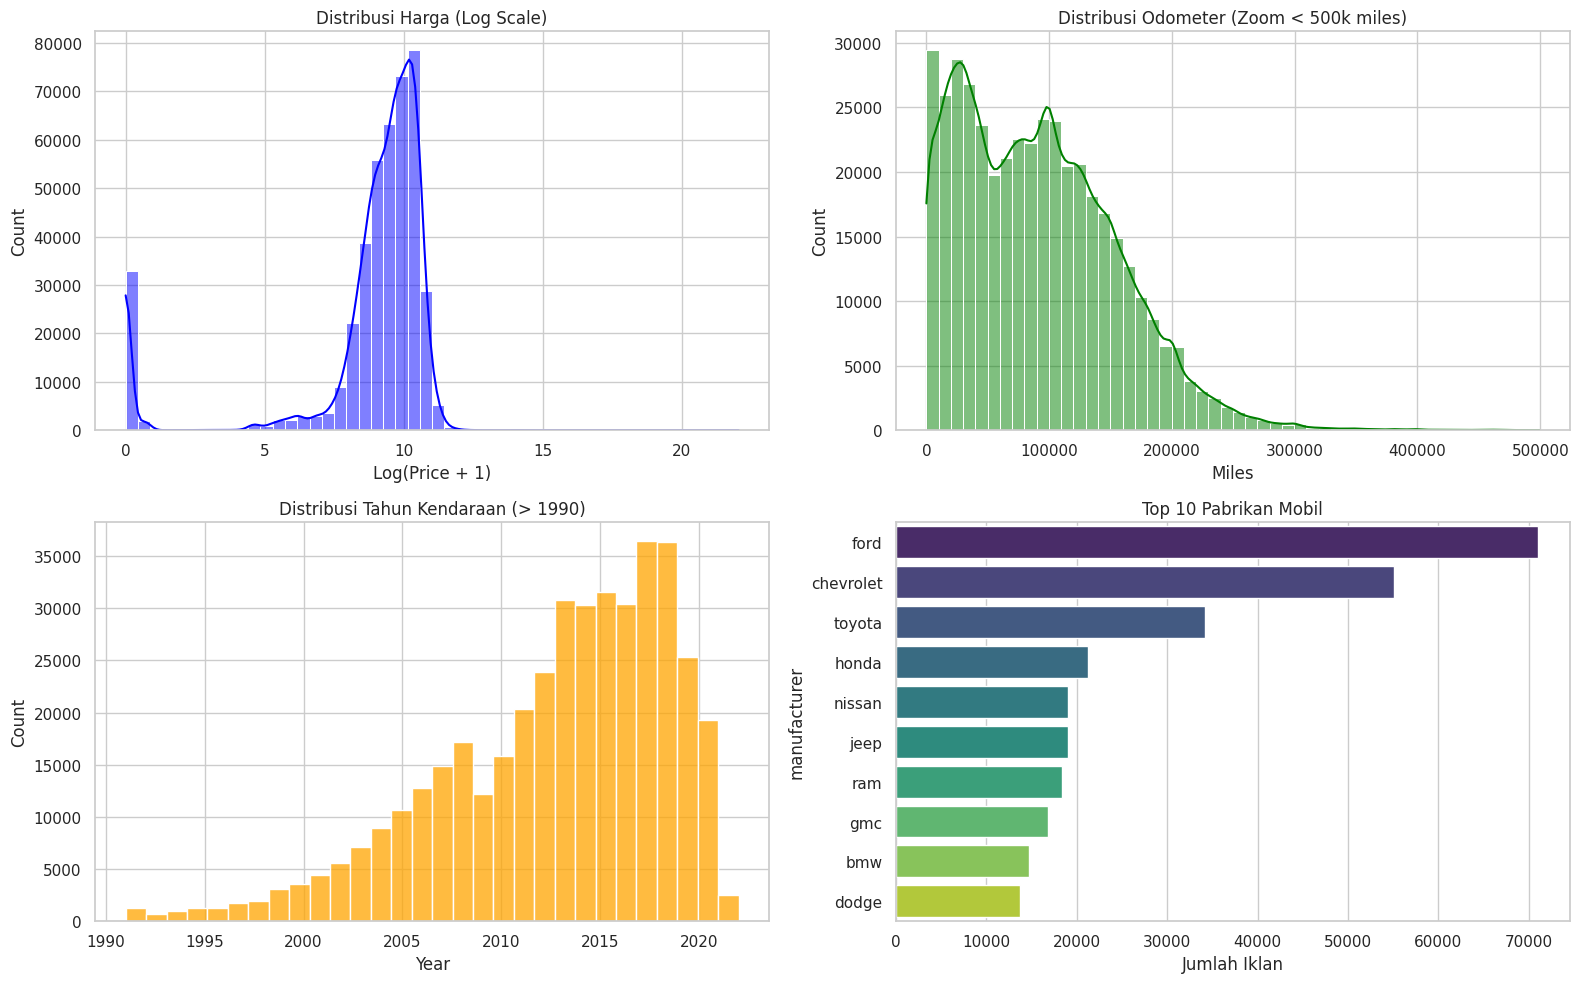


📊 ANALISIS HUBUNGAN (BIVARIATE)


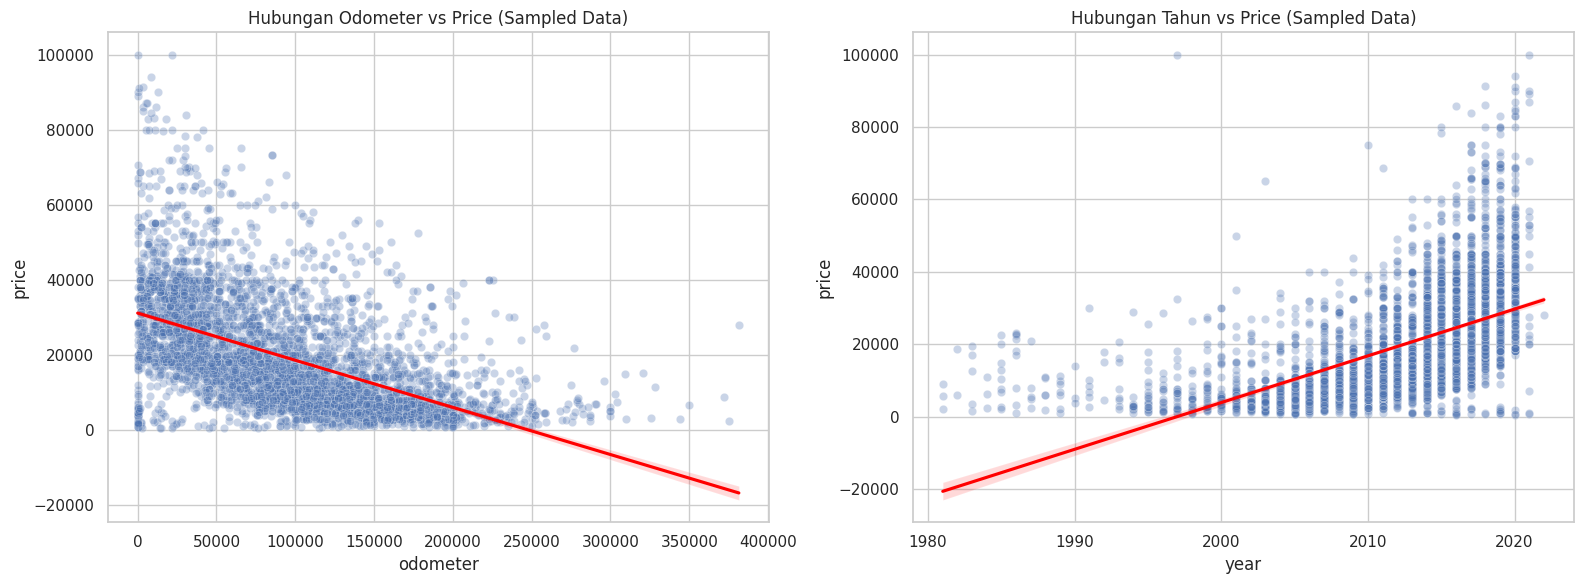

/tmp/ipython-input-2633177737.py:148: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=viz_df, x='condition', y='price', order=order_cond, palette='Set2')


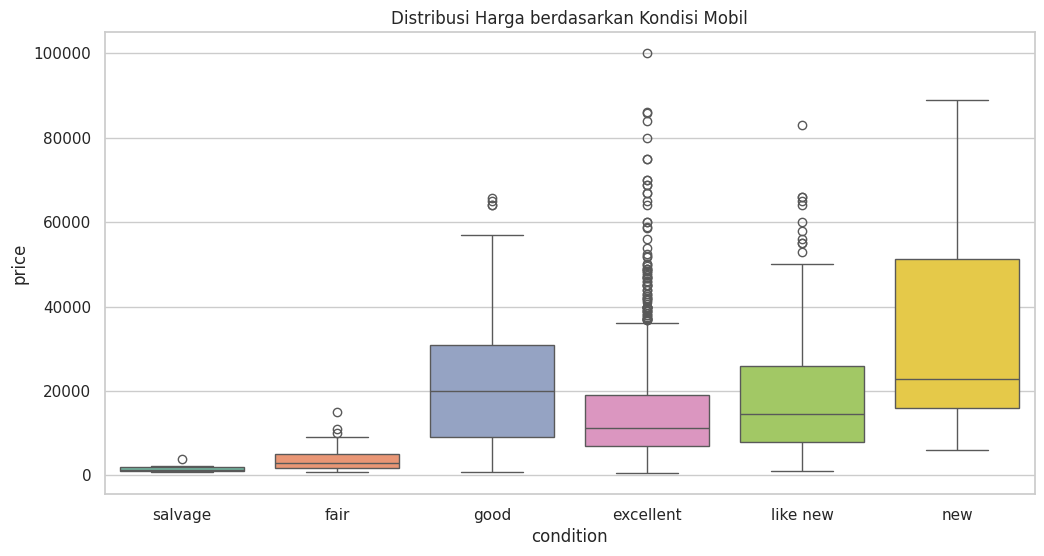

In [2]:
# ==============================================================================
# [CELL 1] IMPORT LIBRARY & LOAD DATA
# ==============================================================================
# Tahap ini memuat semua library yang dibutuhkan dan mengambil data dari Kaggle.
# ==============================================================================

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style visualisasi standar publikasi
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("⏳ Sedang memuat dataset...")

# Download dataset (memastikan versi terbaru)
path = kagglehub.dataset_download("austinreese/craigslist-carstrucks-data")
print("Path dataset:", path)

# Load file ke Pandas DataFrame
file_path = os.path.join(path, "vehicles.csv")
df = pd.read_csv(file_path)

print(f"✅ Dataset berhasil dimuat! Dimensi awal: {df.shape}")
print("-" * 50)
print("5 Baris Pertama Data:")
display(df.head())

# ==============================================================================
# [CELL 2] ANALISIS STRUKTUR & KUALITAS DATA (DATA QUALITY)
# ==============================================================================
# Memeriksa tipe data, missing values, dan duplikasi.
# Output ini penting untuk Bab "Data Understanding" di laporan/skripsi.
# ==============================================================================

print("\n📊 1. INFORMASI UMUM DATASET")
print(df.info())

print("\n📊 2. ANALISIS MISSING VALUES (Kekosongan Data)")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_report = pd.DataFrame({'Total Hilang': missing, 'Persentase (%)': missing_percent})
# Tampilkan hanya yang memiliki missing value, urutkan dari yang terbesar
missing_report = missing_report[missing_report['Total Hilang'] > 0].sort_values(by='Persentase (%)', ascending=False)
display(missing_report)

print("\n📊 3. CEK DUPLIKASI DATA")
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates:,} baris ({(duplicates/len(df))*100:.2f}%)")

# ==============================================================================
# [CELL 3] STATISTIK DESKRIPTIF (Univariate - Numerical)
# ==============================================================================
# Melihat distribusi statistik dasar (Mean, Median, Std Dev, Min, Max).
# Penting untuk mendeteksi anomali (misal: harga $0 atau tahun 2999).
# ==============================================================================

print("\n📊 STATISTIK DESKRIPTIF (FITUR NUMERIK)")
# Menggunakan format float agar tidak muncul notasi ilmiah (e.g. 1e+09)
display(df.describe().apply(lambda s: s.apply('{0:.2f}'.format)))

print("\n🔍 TEMUAN AWAL (ANOMALI POTENSIAL):")
print(f"- Harga Minimum  : ${df['price'].min()} (Indikasi data spam/gratis)")
print(f"- Harga Maksimum : ${df['price'].max()} (Indikasi outlier/error input)")
print(f"- Tahun Minimum  : {df['year'].min()} (Mungkin mobil antik atau error)")
print(f"- Tahun Maksimum : {df['year'].max()} (Cek apakah ada tahun di masa depan)")

# ==============================================================================
# [CELL 4] VISUALISASI DISTRIBUSI (Univariate Analysis)
# ==============================================================================
# Visualisasi untuk memahami bentuk data mentah.
# Karena data mentah sangat kotor, kita menggunakan log-scale atau zooming
# untuk melihat pola di balik outlier.
# ==============================================================================

print("\n📊 VISUALISASI DISTRIBUSI FITUR UTAMA")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Distribusi Harga (Log Scale untuk menangani rentang ekstrem)
# Kita tambah +1 agar log(0) tidak error
sns.histplot(np.log1p(df['price']), bins=50, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribusi Harga (Log Scale)', fontsize=12)
axes[0, 0].set_xlabel('Log(Price + 1)')

# 2. Distribusi Odometer (Jarak Tempuh) - Zooming < 500,000 miles
# Memfilter sementara hanya untuk visualisasi agar histogram terbaca
sns.histplot(df[df['odometer'] < 500000]['odometer'], bins=50, kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribusi Odometer (Zoom < 500k miles)', fontsize=12)
axes[0, 1].set_xlabel('Miles')

# 3. Distribusi Tahun Kendaraan (Year)
# Zooming tahun > 1990 agar grafik fokus pada mobil modern/bekas umum
sns.histplot(df[df['year'] > 1990]['year'], bins=30, kde=False, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Distribusi Tahun Kendaraan (> 1990)', fontsize=12)
axes[1, 0].set_xlabel('Year')

# 4. Top 10 Manufacturer (Pabrikan Terbanyak)
top_mfg = df['manufacturer'].value_counts().head(10)
sns.barplot(x=top_mfg.values, y=top_mfg.index, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Top 10 Pabrikan Mobil', fontsize=12)
axes[1, 1].set_xlabel('Jumlah Iklan')

plt.tight_layout()
plt.show()

# ==============================================================================
# [CELL 5] HUBUNGAN ANTAR VARIABEL (Bivariate Analysis)
# ==============================================================================
# Mencari korelasi awal antara fitur dengan target (Price).
# ==============================================================================

print("\n📊 ANALISIS HUBUNGAN (BIVARIATE)")

# Sampling data untuk scatterplot agar proses rendering cepat & tidak overplotting
# Kita ambil sampel 5000 data acak
sample_df = df.sample(n=5000, random_state=42)

# Filter sampel ekstrem hanya untuk visualisasi scatterplot ini
# (Agar pola terlihat, kita buang harga > $100k dan harga < $500 dari sampel visualisasi)
viz_df = sample_df[(sample_df['price'] > 500) & (sample_df['price'] < 100000) &
                   (sample_df['odometer'] < 400000) & (sample_df['year'] > 1980)]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Scatter Plot: Odometer vs Price
sns.scatterplot(data=viz_df, x='odometer', y='price', alpha=0.3, ax=axes[0])
axes[0].set_title('Hubungan Odometer vs Price (Sampled Data)', fontsize=12)
# Menambahkan garis tren sederhana
sns.regplot(data=viz_df, x='odometer', y='price', scatter=False, ax=axes[0], color='red')

# 2. Scatter Plot: Year vs Price
sns.scatterplot(data=viz_df, x='year', y='price', alpha=0.3, ax=axes[1])
axes[1].set_title('Hubungan Tahun vs Price (Sampled Data)', fontsize=12)
sns.regplot(data=viz_df, x='year', y='price', scatter=False, ax=axes[1], color='red')

plt.tight_layout()
plt.show()

# 3. Boxplot: Kondisi (Condition) vs Price
plt.figure(figsize=(12, 6))
# Mengurutkan kondisi dari jelek ke bagus (berdasarkan logika, bukan data)
order_cond = ['salvage', 'fair', 'good', 'excellent', 'like new', 'new']
sns.boxplot(data=viz_df, x='condition', y='price', order=order_cond, palette='Set2')
plt.title('Distribusi Harga berdasarkan Kondisi Mobil', fontsize=12)
plt.show()


In [3]:
# ==============================================================================
# [CELL 6] DATA CLEANING (PEMBERSIHAN DATA)
# ==============================================================================
# Linear Regression sangat sensitif terhadap outlier (data ekstrim).
# Kita akan memfilter harga dan jarak tempuh yang tidak masuk akal.
# ==============================================================================

# 1. Hapus Duplikat
initial_rows = df.shape[0]
df_clean = df.drop_duplicates()
print(f"🧹 Menghapus {initial_rows - df_clean.shape[0]} baris data duplikat.")

# 2. Filter Harga (Price)
# Berdasarkan EDA, kita membuang harga $0 dan harga miliaran.
# Kita ambil rentang wajar mobil bekas: $500 s/d $100,000
df_clean = df_clean[(df_clean['price'] > 500) & (df_clean['price'] < 100000)]

# 3. Filter Odometer (Jarak Tempuh)
# Membuang mobil dengan jarak tempuh > 500.000 miles (kemungkinan error/rongsok)
# Membuang odometer < 100 miles (mungkin mobil baru/salah input untuk konteks bekas)
df_clean = df_clean[(df_clean['odometer'] < 500000) & (df_clean['odometer'] > 100)]

# 4. Filter Tahun
# Fokus pada mobil di atas tahun 1990 agar relevan dengan pasar saat ini
df_clean = df_clean[df_clean['year'] > 1990]

print(f"📉 Dimensi data setelah cleaning: {df_clean.shape}")
print("-" * 30)
print("Statistik Data Bersih:")
display(df_clean[['price', 'odometer', 'year']].describe().round(2))

🧹 Menghapus 0 baris data duplikat.
📉 Dimensi data setelah cleaning: (362877, 26)
------------------------------
Statistik Data Bersih:


,price,odometer,year
count,362877.00,362877.00,362877.00
mean,19258.12,94764.38,2012.29
std,14218.32,63651.26,5.75
min,501.00,101.00,1991.00
25%,7950.00,40176.00,2009.00
50%,15990.00,89780.00,2013.00
75%,27990.00,137400.00,2017.00
max,99999.00,499232.00,2022.00


In [4]:
# ==============================================================================
# [CELL 7] FEATURE SELECTION & IMPUTATION (MENGISI DATA KOSONG)
# ==============================================================================
# Kita membuang kolom ID/URL dan mengisi nilai NaN dengan Median/Modus.
# ==============================================================================

# 1. Membuang kolom yang tidak relevan untuk prediksi harga
# 'id', 'url', 'VIN', 'lat', 'long' tidak mempengaruhi harga secara langsung dalam model sederhana
# 'county' dibuang karena kosong total (berdasarkan EDA sebelumnya)
cols_to_drop = ['id', 'url', 'region_url', 'image_url', 'lat', 'long',
                'region', 'description', 'county', 'VIN', 'model']

df_model = df_clean.drop(columns=cols_to_drop, errors='ignore')
print("✅ Kolom tidak relevan berhasil dibuang.")

# 2. Handling Missing Values (Imputasi)

# A. Numerik: Isi dengan MEDIAN (lebih aman dari Mean jika ada sedikit outlier tersisa)
df_model['odometer'] = df_model['odometer'].fillna(df_model['odometer'].median())
df_model['year'] = df_model['year'].fillna(df_model['year'].median())

# B. Kategorikal: Isi dengan 'unknown'
# Ini teknik aman agar kita tidak asal menebak merek/bahan bakar mobil
categorical_cols = df_model.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_model[col] = df_model[col].fillna('unknown')

# Cek ulang missing values
total_missing = df_model.isnull().sum().sum()
print(f"✅ Penanganan missing values selesai. Total NaN tersisa: {total_missing}")

✅ Kolom tidak relevan berhasil dibuang.
✅ Penanganan missing values selesai. Total NaN tersisa: 0


In [5]:
# ==============================================================================
# [CELL 8] FEATURE ENGINEERING (REKAYASA FITUR)
# ==============================================================================
# Membuat fitur baru yang lebih mudah dipahami oleh Matematika Linear Regression.
# ==============================================================================

# 1. Membuat Fitur 'Car Age' (Umur Mobil)
# Mengubah tahun (misal: 2010) menjadi umur (misal: 13 tahun)
# Kita gunakan tahun 2023 sebagai referensi tahun saat ini
current_year = 2026
df_model['car_age'] = current_year - df_model['year']

# Hapus kolom 'year' karena sudah diwakili 'car_age'
df_model.drop(columns=['year'], inplace=True)

# 2. Ordinal Encoding untuk 'condition'
# Karena 'condition' punya tingkatan (jelek -> bagus), kita beri skor angka.
condition_map = {
    'salvage': 0,
    'unknown': 1, # Kita anggap unknown lebih baik dari rongsok, tapi di bawah fair
    'fair': 2,
    'good': 3,
    'excellent': 4,
    'like new': 5,
    'new': 6
}
df_model['condition_score'] = df_model['condition'].map(condition_map)

# Hapus kolom teks asli
df_model.drop(columns=['condition'], inplace=True)

print("✅ Feature Engineering selesai.")
print("Contoh data baru:")
display(df_model[['price', 'car_age', 'condition_score']].head())

✅ Feature Engineering selesai.
Contoh data baru:


,price,car_age,condition_score
27,33590,12.0,3
28,22590,16.0,3
29,39590,6.0,3
30,30990,9.0,3
31,15000,13.0,4


In [6]:
# ==============================================================================
# [CELL 9] ONE-HOT ENCODING
# ==============================================================================
# Mengubah variabel kategori (Teks) menjadi variabel Dummy (0 dan 1).
# ==============================================================================

# Daftar kolom yang akan di-encode
# Catatan: Manufacturer memiliki banyak kategori, ini akan menambah jumlah kolom secara signifikan
cat_features = ['manufacturer', 'cylinders', 'fuel', 'title_status',
                'transmission', 'drive', 'size', 'type', 'paint_color', 'state']

print(f"⏳ Sedang melakukan Encoding untuk fitur: {cat_features}...")

# pd.get_dummies mengubah kategori jadi kolom biner.
# drop_first=True SANGAT PENTING untuk Linear Regression guna mencegah Multicollinearity.
df_final = pd.get_dummies(df_model, columns=cat_features, drop_first=True)

print(f"✅ Encoding Selesai.")
print(f"Dimensi Data Akhir: {df_final.shape} (Baris, Kolom)")

⏳ Sedang melakukan Encoding untuk fitur: ['manufacturer', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']...
✅ Encoding Selesai.
Dimensi Data Akhir: (362877, 150) (Baris, Kolom)


In [7]:
# ==============================================================================
# [CELL 10 - FINAL FIX] TRAIN-TEST SPLIT & SCALING
# ==============================================================================
# Perbaikan: Hanya membuang kolom 'posting_date' dan konversi True/False ke 1/0.
# Hasil One-Hot Encoding akan AMAN dan tidak terhapus.
# ==============================================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Hapus Spesifik Kolom yang Menyebabkan Error (Tanggal/Teks)
# Kita hapus 'posting_date' secara eksplisit
cols_to_remove = ['posting_date', 'description']
df_final = df_final.drop(columns=cols_to_remove, errors='ignore')

# 2. Konversi tipe data Boolean (True/False) menjadi Angka (1/0)
# Ini penting karena get_dummies menghasilkan True/False,
# sedangkan StandardScaler butuh angka 1/0.
bool_cols = df_final.select_dtypes(include=['bool']).columns
if len(bool_cols) > 0:
    print(f"🔄 Mengonversi {len(bool_cols)} kolom Boolean (True/False) menjadi Angka (1/0)...")
    df_final[bool_cols] = df_final[bool_cols].astype(int)

# 3. Cek apakah masih ada kolom object (teks) yang tertinggal?
# Jika ada, kita buang. Jika tidak, aman.
df_numeric = df_final.select_dtypes(exclude=['object'])
print(f"✅ Kolom tersisa (hanya angka): {df_numeric.shape[1]}")

# 4. Pisahkan Fitur (X) dan Target (y)
X = df_numeric.drop('price', axis=1)
y = df_numeric['price']

# 5. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Scaling (Standardization)
scaler = StandardScaler()

# Fit pada training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("-" * 40)
print("✅ PREPROCESSING SELESAI (FIXED)!")
print("-" * 40)
print(f"Jumlah Data Training : {X_train.shape[0]} baris")
print(f"Jumlah Data Testing  : {X_test.shape[0]} baris")
# Jumlah fitur harusnya Ratusan (bukan 3 lagi)
print(f"Jumlah Fitur Masuk   : {X_train.shape[1]} kolom")
print("-" * 40)
print("Variabel siap pakai: X_train_scaled, X_test_scaled, y_train, y_test")

🔄 Mengonversi 145 kolom Boolean (True/False) menjadi Angka (1/0)...
✅ Kolom tersisa (hanya angka): 149
----------------------------------------
✅ PREPROCESSING SELESAI (FIXED)!
----------------------------------------
Jumlah Data Training : 290301 baris
Jumlah Data Testing  : 72576 baris
Jumlah Fitur Masuk   : 148 kolom
----------------------------------------
Variabel siap pakai: X_train_scaled, X_test_scaled, y_train, y_test


In [8]:
# ==============================================================================
# [CELL 11] MODELING (PELATIHAN MODEL)
# ==============================================================================
# Tahap CRISP-DM: Modeling
# Kita menggunakan algoritma Linear Regression.
# Model akan mencari koefisien (bobot) terbaik untuk setiap fitur.
# ==============================================================================

from sklearn.linear_model import LinearRegression

print("⏳ Sedang melatih model Linear Regression...")

# 1. Inisialisasi Model
model = LinearRegression()

# 2. Training (Fit)
# Mesin belajar dari data X_train_scaled dan y_train
model.fit(X_train_scaled, y_train)

print("✅ Model berhasil dilatih!")

# 3. Prediksi
# Kita minta model menebak harga untuk data ujian (Test Set)
y_pred = model.predict(X_test_scaled)

print("✅ Prediksi selesai. Siap untuk dievaluasi.")
print(f"Contoh 5 Prediksi Pertama : {y_pred[:5]}")
print(f"Contoh 5 Harga Asli       : {y_test.values[:5]}")

⏳ Sedang melatih model Linear Regression...
✅ Model berhasil dilatih!
✅ Prediksi selesai. Siap untuk dievaluasi.
Contoh 5 Prediksi Pertama : [26940.96352679 28159.05507909 16224.0547097  14344.15943812
 19366.15387254]
Contoh 5 Harga Asli       : [32590 27990 14995  8900 24995]


In [9]:
# ==============================================================================
# [CELL 12] EVALUASI STATISTIK (METRICS)
# ==============================================================================
# Tahap CRISP-DM: Evaluation
# Mengukur performa model menggunakan MAE, MSE, RMSE, dan R2 Score.
# ==============================================================================

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Hitung Metrik
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 LAPORAN PERFORMA MODEL LINEAR REGRESSION")
print("=" * 50)
print(f"1. MAE (Rata-rata Error) : ${mae:,.2f}")
print(f"   -> Artinya: Rata-rata tebakan model meleset sekitar ${mae:,.0f} dari harga asli.")
print("-" * 50)
print(f"2. RMSE (Error Kuadrat)  : ${rmse:,.2f}")
print(f"   -> Jika nilai ini jauh lebih besar dari MAE, berarti ada beberapa tebakan yang meleset parah (outlier).")
print("-" * 50)
print(f"3. R² Score (Akurasi)    : {r2:.4f} (atau {r2*100:.2f}%)")
print(f"   -> Artinya: Model mampu menjelaskan {r2*100:.2f}% variasi harga mobil.")
print("=" * 50)

# Interpretasi Singkat
if r2 > 0.7:
    print("✅ Kesimpulan: Model performanya BAGUS (Good Fit).")
elif r2 > 0.5:
    print("⚠️ Kesimpulan: Model performanya CUKUP (Moderate Fit).")
else:
    print("❌ Kesimpulan: Model KURANG AKURAT (Underfitting). Perlu algoritma yang lebih kompleks.")

📊 LAPORAN PERFORMA MODEL LINEAR REGRESSION
1. MAE (Rata-rata Error) : $5,423.28
   -> Artinya: Rata-rata tebakan model meleset sekitar $5,423 dari harga asli.
--------------------------------------------------
2. RMSE (Error Kuadrat)  : $7,882.57
   -> Jika nilai ini jauh lebih besar dari MAE, berarti ada beberapa tebakan yang meleset parah (outlier).
--------------------------------------------------
3. R² Score (Akurasi)    : 0.6873 (atau 68.73%)
   -> Artinya: Model mampu menjelaskan 68.73% variasi harga mobil.
⚠️ Kesimpulan: Model performanya CUKUP (Moderate Fit).


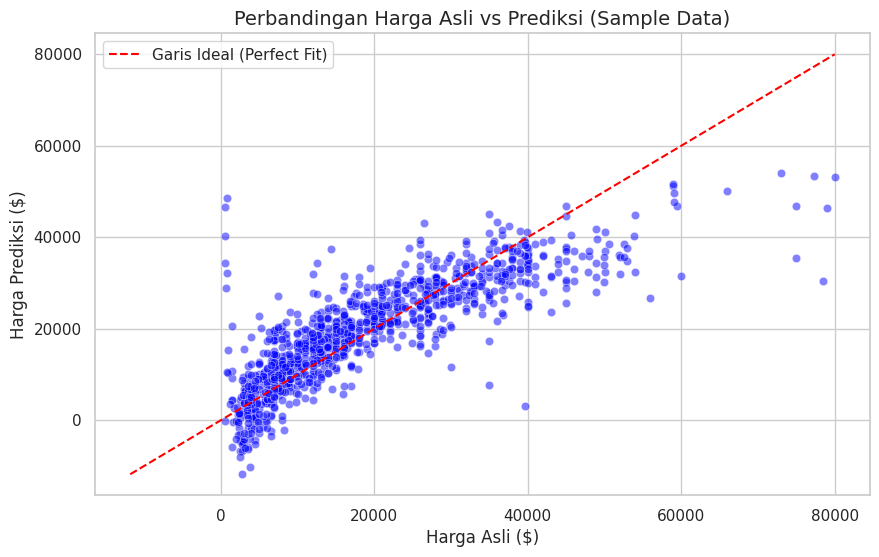

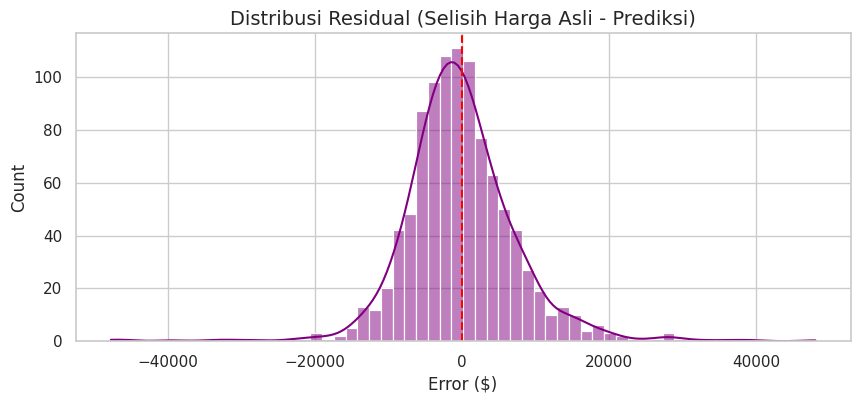

In [10]:
# ==============================================================================
# [CELL 13] VISUALISASI HASIL PREDIKSI
# ==============================================================================
# Membuat Scatter Plot: Sumbu X = Harga Asli, Sumbu Y = Prediksi.
# Garis merah putus-putus adalah garis sempurna (jika prediksi 100% benar).
# ==============================================================================

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Ambil sampel kecil agar plotting tidak berat (misal 500 titik)
# Kita buat DataFrame sementara untuk plotting
plot_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plot_sample = plot_data.sample(n=1000, random_state=42)

sns.scatterplot(data=plot_sample, x='Actual', y='Predicted', alpha=0.5, color='blue')

# Garis referensi perfect prediction
min_val = min(plot_sample['Actual'].min(), plot_sample['Predicted'].min())
max_val = max(plot_sample['Actual'].max(), plot_sample['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Garis Ideal (Perfect Fit)')

plt.title('Perbandingan Harga Asli vs Prediksi (Sample Data)', fontsize=14)
plt.xlabel('Harga Asli ($)', fontsize=12)
plt.ylabel('Harga Prediksi ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Visualisasi Residual (Sisa Error)
# Pola acak = Bagus. Pola membentuk corong/kurva = Masalah pada model.
plt.figure(figsize=(10, 4))
residuals = plot_sample['Actual'] - plot_sample['Predicted']
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribusi Residual (Selisih Harga Asli - Prediksi)', fontsize=14)
plt.xlabel('Error ($)')
plt.axvline(0, color='red', linestyle='--')
plt.show()

In [11]:
# ==============================================================================
# [CELL 14] INTERPRETASI KOEFISIEN (FEATURE IMPORTANCE)
# ==============================================================================
# Melihat fitur apa yang paling berpengaruh terhadap kenaikan/penurunan harga.
# ==============================================================================

# Mengambil nama fitur
feature_names = X.columns

# Mengambil nilai koefisien dari model
coefficients = model.coef_

# Membuat DataFrame
coeff_df = pd.DataFrame({
    'Fitur': feature_names,
    'Koefisien ($)': coefficients,
    'Pengaruh': ['Positif (Naik)' if x > 0 else 'Negatif (Turun)' for x in coefficients],
    'Absolut': abs(coefficients) # Untuk pengurutan
})

# Urutkan berdasarkan dampak terbesar (Absolut)
top_features = coeff_df.sort_values(by='Absolut', ascending=False).head(15)

print("📊 15 FAKTOR TERBESAR PENENTU HARGA MOBIL")
print("=" * 60)
display(top_features[['Fitur', 'Koefisien ($)', 'Pengaruh']])

print("\n💡 CARA BACA:")
print("- Koefisien Positif: Jika fitur ini ada/naik, harga mobil bertambah mahal.")
print("- Koefisien Negatif: Jika fitur ini ada/naik, harga mobil jadi lebih murah.")
print("  Contoh: Jika 'car_age' negatif, berarti semakin tua mobil, harga makin turun.")

📊 15 FAKTOR TERBESAR PENENTU HARGA MOBIL


,Fitur,Koefisien ($),Pengaruh
1,car_age,-5855.647971,Negatif (Turun)
53,fuel_gas,-5541.879505,Negatif (Turun)
0,odometer,-4355.866961,Negatif (Turun)
46,cylinders_4 cylinders,-3876.845316,Negatif (Turun)
51,cylinders_unknown,-3535.018043,Negatif (Turun)
55,fuel_other,-3248.733347,Negatif (Turun)
48,cylinders_6 cylinders,-2893.099634,Negatif (Turun)
66,drive_fwd,-2299.750903,Negatif (Turun)
54,fuel_hybrid,-1759.514438,Negatif (Turun)
68,drive_unknown,-1627.627842,Negatif (Turun)



💡 CARA BACA:
- Koefisien Positif: Jika fitur ini ada/naik, harga mobil bertambah mahal.
- Koefisien Negatif: Jika fitur ini ada/naik, harga mobil jadi lebih murah.
  Contoh: Jika 'car_age' negatif, berarti semakin tua mobil, harga makin turun.


# **Percobaan Menggunakan XGBOOST**

⏳ Sedang melatih model XGBoost... (Ini mungkin memakan waktu lebih lama dari Linear Regression)
✅ Model XGBoost berhasil dilatih dalam 71.76 detik!
✅ Prediksi selesai.
Contoh 5 Prediksi XGB : [30877.67  29565.152 12828.602 11302.153 22061.639]
Contoh 5 Harga Asli   : [32590 27990 14995  8900 24995]
📊 LAPORAN PERFORMA MODEL XGBOOST
1. MAE (Rata-rata Error) : $3,396.51
   (Linear Reg sebelumnya: ~$5,423)
--------------------------------------------------
2. RMSE (Error Kuadrat)  : $5,497.39
   (Linear Reg sebelumnya: ~$7,882)
--------------------------------------------------
3. R² Score (Akurasi)    : 0.8479 (atau 84.79%)
   (Linear Reg sebelumnya: 68.73%)
✅ Kesimpulan: Model BAGUS (Good Fit). Peningkatan signifikan dari Linear Regression.


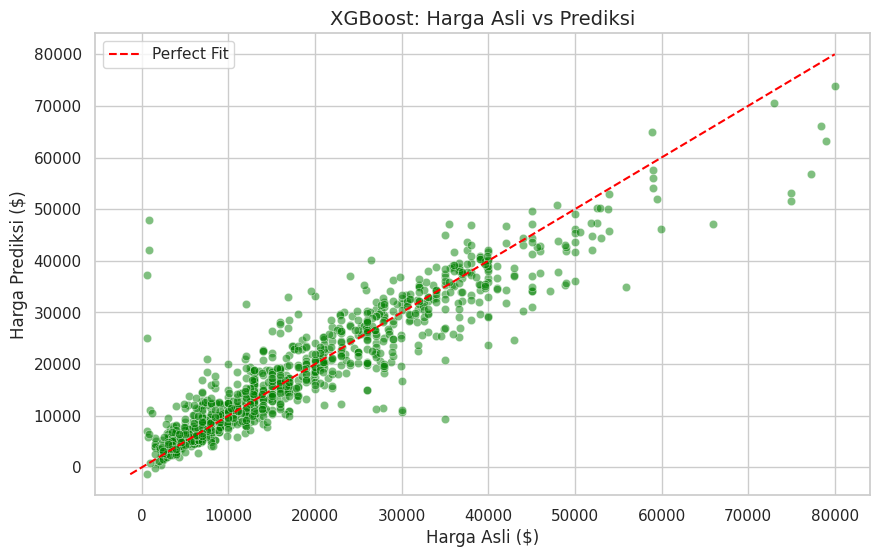

/tmp/ipython-input-1766212541.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Fitur', data=fi_df, palette='viridis')


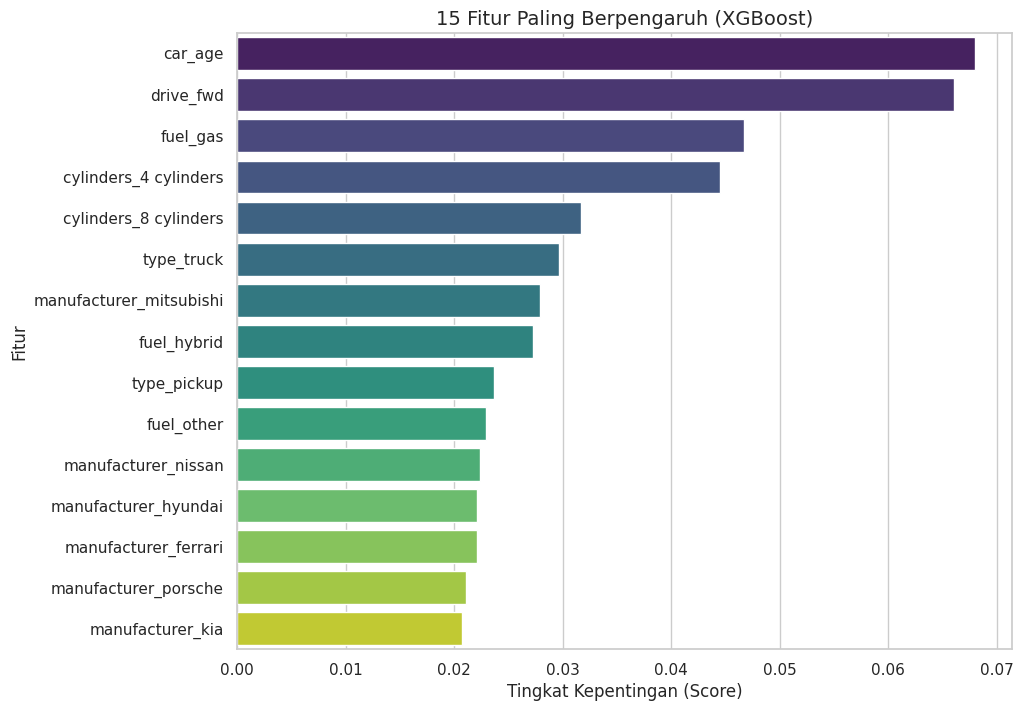

In [12]:
# ==============================================================================
# [CELL 11 - XGBOOST] TRAINING MODEL
# ==============================================================================
# Menggunakan algoritma XGBoost yang jauh lebih powerful daripada Linear Regression.
# Model ini membangun ratusan "pohon keputusan" (Decision Trees) secara bertahap
# untuk memperbaiki error dari pohon sebelumnya.
# ==============================================================================

import xgboost as xgb
from xgboost import XGBRegressor
import time

print("⏳ Sedang melatih model XGBoost... (Ini mungkin memakan waktu lebih lama dari Linear Regression)")

# 1. Inisialisasi Model dengan Parameter Menengah
# n_estimators=1000 : Membuat 1000 pohon keputusan (semakin banyak semakin akurat, tapi lambat)
# learning_rate=0.05 : Kecepatan belajar (kecil = lebih teliti)
# max_depth=6        : Kedalaman pohon (semakin dalam semakin kompleks menangkap pola)
# n_jobs=-1          : Menggunakan semua core CPU agar cepat
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    random_state=42
)

# 2. Training (Fit)
start_time = time.time()
xgb_model.fit(X_train_scaled, y_train)
end_time = time.time()

print(f"✅ Model XGBoost berhasil dilatih dalam {end_time - start_time:.2f} detik!")

# 3. Prediksi ke Data Test
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("✅ Prediksi selesai.")
print(f"Contoh 5 Prediksi XGB : {y_pred_xgb[:5]}")
print(f"Contoh 5 Harga Asli   : {y_test.values[:5]}")

# ==============================================================================
# [CELL 12 - XGBOOST] EVALUASI STATISTIK
# ==============================================================================
# Menghitung MAE, RMSE, dan R2 Score untuk melihat peningkatan akurasi.
# ==============================================================================

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Hitung Metrik
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

print("📊 LAPORAN PERFORMA MODEL XGBOOST")
print("=" * 50)
print(f"1. MAE (Rata-rata Error) : ${mae:,.2f}")
print(f"   (Linear Reg sebelumnya: ~$5,423)")
print("-" * 50)
print(f"2. RMSE (Error Kuadrat)  : ${rmse:,.2f}")
print(f"   (Linear Reg sebelumnya: ~$7,882)")
print("-" * 50)
print(f"3. R² Score (Akurasi)    : {r2:.4f} (atau {r2*100:.2f}%)")
print(f"   (Linear Reg sebelumnya: 68.73%)")
print("=" * 50)

# Kesimpulan Otomatis
if r2 > 0.85:
    print("🌟 Kesimpulan: Model SANGAT BAGUS (Excellent Fit).")
elif r2 > 0.75:
    print("✅ Kesimpulan: Model BAGUS (Good Fit). Peningkatan signifikan dari Linear Regression.")
else:
    print("⚠️ Kesimpulan: Ada peningkatan, tapi mungkin perlu tuning parameter lagi.")

    # ==============================================================================
# [CELL 13 - XGBOOST] VISUALISASI HASIL & FITUR PENTING
# ==============================================================================
# 1. Scatter Plot Prediksi vs Asli
# 2. Feature Importance (Apa yang membuat harga mobil mahal/murah menurut XGBoost?)
# ==============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Plot 1: Actual vs Predicted ---
plt.figure(figsize=(10, 6))

# Ambil sampel agar plot ringan
plot_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
plot_sample = plot_data.sample(n=1000, random_state=42)

sns.scatterplot(data=plot_sample, x='Actual', y='Predicted', alpha=0.5, color='green')

# Garis Ideal
min_val = min(plot_sample['Actual'].min(), plot_sample['Predicted'].min())
max_val = max(plot_sample['Actual'].max(), plot_sample['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Fit')

plt.title('XGBoost: Harga Asli vs Prediksi', fontsize=14)
plt.xlabel('Harga Asli ($)')
plt.ylabel('Harga Prediksi ($)')
plt.legend()
plt.grid(True)
plt.show()

# --- Plot 2: Feature Importance ---
# Mengambil tingkat kepentingan fitur
importances = xgb_model.feature_importances_
feature_names = X.columns # Mengambil nama kolom dari X (bukan X_train_scaled)

# Buat DataFrame
fi_df = pd.DataFrame({'Fitur': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False).head(15) # Top 15 Fitur

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Fitur', data=fi_df, palette='viridis')
plt.title('15 Fitur Paling Berpengaruh (XGBoost)', fontsize=14)
plt.xlabel('Tingkat Kepentingan (Score)')
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00
😼 TRAINING CATBOOST DEFAULT (Mohon Tunggu)...

📊 LAPORAN PERFORMA: CATBOOST DEFAULT
1. R2 Score (Akurasi) : 0.8411 (84.11%)
2. MAE (Rata-rata Error) : $3,496.82
3. RMSE (Error Kuadrat)  : $5,619.90

🔍 5 CONTOH PREDIKSI VS HARGA ASLI:


,Harga Asli ($),Prediksi Model ($),Selisih ($)
0,32590,"31,644.99",945.01
1,27990,"28,501.87",511.87
2,14995,"13,164.58","1,830.42"
3,8900,"11,544.04","2,644.04"
4,24995,"21,965.01","3,029.99"


/tmp/ipython-input-2540715356.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_imp, palette='Oranges_r', ax=ax2)
/tmp/ipython-input-2540715356.py:82: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


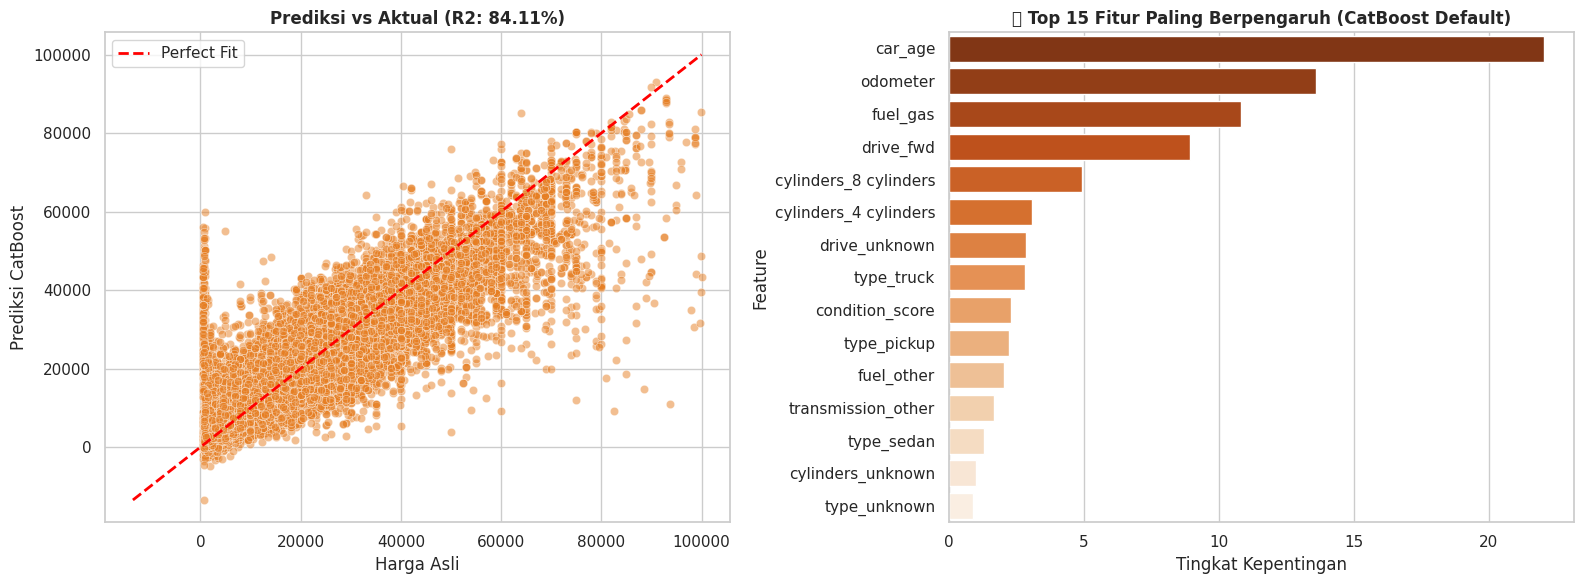

In [15]:
# ==============================================================================
# [CELL 1] CATBOOST
# ==============================================================================
# Tujuan: Melihat performa CatBoost "Out of the Box" (Tanpa Tuning).
# Output: Data Prediksi, Metrics, Scatter Plot, dan Fitur Paling Berpengaruh.
# ==============================================================================



from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Style
sns.set_style("whitegrid")

print("😼 TRAINING CATBOOST DEFAULT (Mohon Tunggu)...")
# verbose=0 biar output bersih, tidak spam training log
cat_default = CatBoostRegressor(loss_function='RMSE', random_state=42, verbose=0)
cat_default.fit(X_train, y_train)

# 2. Evaluasi Performa
y_pred_cat = cat_default.predict(X_test)
r2_cat = r2_score(y_test, y_pred_cat)
mae_cat = mean_absolute_error(y_test, y_pred_cat)
rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))

# ------------------------------------------------------------------------------
# A. OUTPUT DATA (5 CONTOH PREDIKSI)
# ------------------------------------------------------------------------------
print("\n" + "="*50)
print("📊 LAPORAN PERFORMA: CATBOOST DEFAULT")
print("="*50)
print(f"1. R2 Score (Akurasi) : {r2_cat:.4f} ({(r2_cat*100):.2f}%)")
print(f"2. MAE (Rata-rata Error) : ${mae_cat:,.2f}")
print(f"3. RMSE (Error Kuadrat)  : ${rmse_cat:,.2f}")

print("\n🔍 5 CONTOH PREDIKSI VS HARGA ASLI:")
# Buat DataFrame Kecil untuk display
df_contoh = pd.DataFrame({
    'Harga Asli ($)': y_test[:5].values,
    'Prediksi Model ($)': y_pred_cat[:5],
    'Selisih ($)': abs(y_test[:5].values - y_pred_cat[:5])
})
# Format display agar ada koma ribuan
pd.options.display.float_format = '{:,.2f}'.format
display(df_contoh)

# ------------------------------------------------------------------------------
# B. VISUALISASI LENGKAP
# ------------------------------------------------------------------------------
fig = plt.figure(figsize=(16, 6))

# Plot 1: Scatter Plot Prediksi vs Aktual
ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_cat, alpha=0.5, color='#e67e22', ax=ax1) # Warna Orange Khas CatBoost
# Garis Perfect Prediction
min_val = min(y_test.min(), y_pred_cat.min())
max_val = max(y_test.max(), y_pred_cat.max())
ax1.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label="Perfect Fit")
ax1.set_title(f"Prediksi vs Aktual (R2: {r2_cat:.2%})", fontsize=12, fontweight='bold')
ax1.set_xlabel("Harga Asli")
ax1.set_ylabel("Prediksi CatBoost")
ax1.legend()

# Plot 2: Top 15 Feature Importance
ax2 = fig.add_subplot(1, 2, 2)
feature_imp = cat_default.get_feature_importance()
feature_names = X_train.columns
# Buat DataFrame & Sort
df_imp = pd.DataFrame({'Feature': feature_names, 'Importance': feature_imp})
df_imp = df_imp.sort_values(by='Importance', ascending=False).head(15)

sns.barplot(x='Importance', y='Feature', data=df_imp, palette='Oranges_r', ax=ax2)
ax2.set_title("🏆 Top 15 Fitur Paling Berpengaruh (CatBoost Default)", fontsize=12, fontweight='bold')
ax2.set_xlabel("Tingkat Kepentingan")

plt.tight_layout()
plt.show()

## **Percobaan Mentuning XGBoost**

🚀 MEMULAI TUNING (Hanya model Tuned yang dilatih, sisanya ambil dari memori)...
[1/3] Mengambil Rapor Model Sebelumnya...
   ✅ Linear Regression (Loaded): R2 = 0.6873
   ✅ XGBoost Default (Loaded)  : R2 = 0.8479
   ✅ CatBoost Default (Loaded) : R2 = 0.8411

[2/3] Melakukan Tuning (Training Baru)...
   🛠️  Sedang Tuning XGBoost...
      -> XGBoost Tuned Selesai! R2: 0.8878
   🛠️  Sedang Tuning CatBoost...
      -> CatBoost Tuned Selesai! R2: 0.8622

🏆 HASIL AKHIR: BATTLE OF MODELS
JUARA UMUM : XGBoost Tuned
AKURASI    : 88.78% (R2 Score)
ALASAN     : Tuning XGBoost berhasil meningkatkan akurasi maksimal.


/tmp/ipython-input-2234413666.py:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis', ax=ax3)


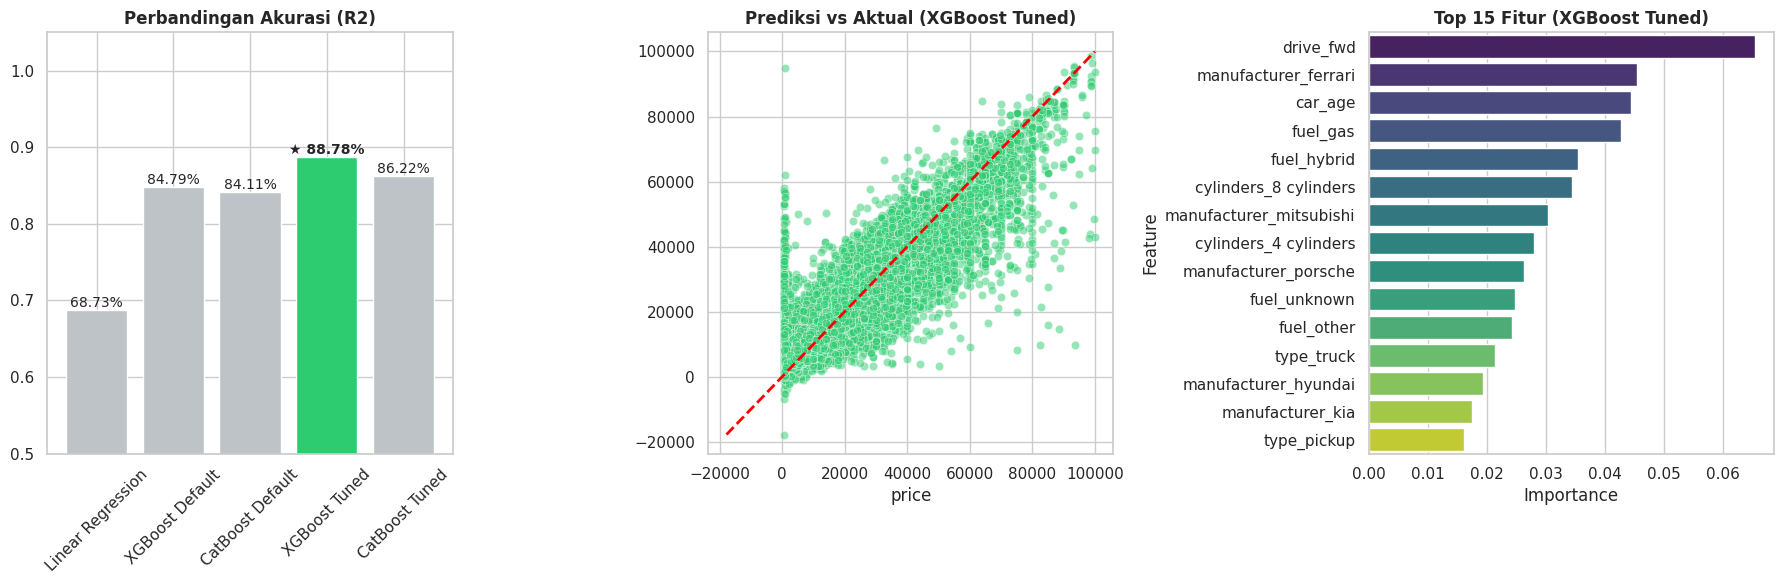

In [19]:
# ==============================================================================
# [CELL 18 - FINAL FIXED] THE REAL BATTLE: TUNING & COMPARISON
# ==============================================================================
# PERBAIKAN:
# 1. Baseline (Linear, XGB Def, Cat Def) TIDAK DITRAINING ULANG.
# 2. Kita mengambil model yang SUDAH JADI dari cell sebelumnya (model, xgb_model, cat_default).
# 3. Komputasi berat hanya dialokasikan untuk TUNING XGBoost & CatBoost.
# ==============================================================================

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
from catboost import CatBoostRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Setup Style
sns.set_style("whitegrid")
pd.options.display.float_format = '{:,.4f}'.format

print("🚀 MEMULAI TUNING (Hanya model Tuned yang dilatih, sisanya ambil dari memori)...")
print("="*60)

# ------------------------------------------------------------------------------
# 1. AMBIL MODEL LAMA DARI MEMORI (CEPAT)
# ------------------------------------------------------------------------------
print("[1/3] Mengambil Rapor Model Sebelumnya...")

baseline_scores = {}
model_objects = {}

# --- A. Retrieve Linear Regression ---
if 'model' in locals():
    # Linear Regression di cell sebelumnya pakai X_test_scaled
    if 'X_test_scaled' in locals():
        r2_lin = r2_score(y_test, model.predict(X_test_scaled))
    else:
        r2_lin = r2_score(y_test, model.predict(X_test))

    baseline_scores['Linear Regression'] = r2_lin
    model_objects['Linear Regression'] = model
    print(f"   ✅ Linear Regression (Loaded): R2 = {r2_lin:.4f}")
else:
    print("   ❌ Linear Regression tidak ditemukan (Jalankan cell Linear Regression dulu).")
    baseline_scores['Linear Regression'] = 0

# --- B. Retrieve XGBoost Default ---
if 'xgb_model' in locals():
    # XGBoost di cell sebelumnya pakai X_test_scaled
    if 'X_test_scaled' in locals():
        r2_xgb_def = r2_score(y_test, xgb_model.predict(X_test_scaled))
    else:
        r2_xgb_def = r2_score(y_test, xgb_model.predict(X_test))

    baseline_scores['XGBoost Default'] = r2_xgb_def
    model_objects['XGBoost Default'] = xgb_model
    print(f"   ✅ XGBoost Default (Loaded)  : R2 = {r2_xgb_def:.4f}")
else:
    print("   ❌ XGBoost Default tidak ditemukan (Jalankan cell XGBoost dulu).")
    baseline_scores['XGBoost Default'] = 0

# --- C. Retrieve CatBoost Default ---
if 'cat_default' in locals():
    # CatBoost biasanya pakai X_test biasa (unscaled), tapi kita cek
    try:
        r2_cat_def = r2_score(y_test, cat_default.predict(X_test))
    except:
        r2_cat_def = r2_score(y_test, cat_default.predict(X_test_scaled))

    baseline_scores['CatBoost Default'] = r2_cat_def
    model_objects['CatBoost Default'] = cat_default
    print(f"   ✅ CatBoost Default (Loaded) : R2 = {r2_cat_def:.4f}")
else:
    print("   ❌ CatBoost Default tidak ditemukan (Jalankan cell CatBoost dulu).")
    baseline_scores['CatBoost Default'] = 0

# ------------------------------------------------------------------------------
# 2. LAKUKAN TUNING (PROSES UTAMA)
# ------------------------------------------------------------------------------
print("\n[2/3] Melakukan Tuning (Training Baru)...")

# Tentukan data mana yang dipakai untuk training
X_train_tune = X_train_scaled if 'X_train_scaled' in locals() else X_train
X_test_tune = X_test_scaled if 'X_test_scaled' in locals() else X_test

# --- A. Tuning XGBoost ---
print("   🛠️  Sedang Tuning XGBoost...")
param_xgb = {
    'n_estimators': [300, 500],
    'learning_rate': [0.05, 0.1],
    'max_depth': [6, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
rs_xgb = RandomizedSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1),
                            param_xgb, n_iter=10, cv=3, scoring='neg_mean_squared_error', verbose=0, random_state=42)
rs_xgb.fit(X_train_tune, y_train)
best_xgb = rs_xgb.best_estimator_
r2_xgb_tuned = r2_score(y_test, best_xgb.predict(X_test_tune))
print(f"      -> XGBoost Tuned Selesai! R2: {r2_xgb_tuned:.4f}")

# --- B. Tuning CatBoost ---
print("   🛠️  Sedang Tuning CatBoost...")
param_cat = {
    'iterations': [500, 1000],
    'learning_rate': [0.05, 0.1],
    'depth': [6, 8],
    'l2_leaf_reg': [1, 5]
}
# Gunakan X_train biasa untuk CatBoost jika memungkinkan (lebih optimal), tapi scaled juga oke
X_train_cat = X_train
rs_cat = RandomizedSearchCV(CatBoostRegressor(loss_function='RMSE', verbose=0, random_state=42),
                            param_cat, n_iter=10, cv=3, scoring='neg_mean_squared_error', verbose=0, random_state=42)
rs_cat.fit(X_train_cat, y_train)
best_cat = rs_cat.best_estimator_
r2_cat_tuned = r2_score(y_test, best_cat.predict(X_test))
print(f"      -> CatBoost Tuned Selesai! R2: {r2_cat_tuned:.4f}")

# ------------------------------------------------------------------------------
# 3. HASIL AKHIR & VISUALISASI
# ------------------------------------------------------------------------------
print("\n" + "="*60)
print("🏆 HASIL AKHIR: BATTLE OF MODELS")

all_scores = baseline_scores.copy()
all_scores['XGBoost Tuned'] = r2_xgb_tuned
all_scores['CatBoost Tuned'] = r2_cat_tuned

# Tentukan Pemenang
winner_name = max(all_scores, key=all_scores.get)
winner_score = all_scores[winner_name]

# Siapkan Model Pemenang
if winner_name == 'XGBoost Tuned':
    final_model = best_xgb
    final_X_test = X_test_tune
    color_code = '#2ecc71' # Hijau
    reason = "Tuning XGBoost berhasil meningkatkan akurasi maksimal."
elif winner_name == 'CatBoost Tuned':
    final_model = best_cat
    final_X_test = X_test
    color_code = '#e67e22' # Orange
    reason = "Tuning CatBoost memberikan hasil paling stabil dan akurat."
elif winner_name == 'XGBoost Default':
    final_model = xgb_model
    final_X_test = X_test_tune
    color_code = '#27ae60'
    reason = "XGBoost Default sudah sangat kuat, tuning tidak perlu."
elif winner_name == 'CatBoost Default':
    final_model = cat_default
    final_X_test = X_test
    color_code = '#d35400'
    reason = "CatBoost Default secara mengejutkan mengalahkan versi Tuned."
else:
    final_model = model
    final_X_test = X_test_tune
    color_code = 'gray'
    reason = "Baseline Linear menang."

print(f"JUARA UMUM : {winner_name}")
print(f"AKURASI    : {winner_score:.2%} (R2 Score)")
print(f"ALASAN     : {reason}")
print("="*60)

# Simpan variabel global untuk cell terakhir
final_model_winner = final_model

# --- VISUALISASI ---
fig = plt.figure(figsize=(18, 6))
gs = fig.add_gridspec(1, 3)

# 1. Bar Chart
ax1 = fig.add_subplot(gs[0, 0])
names = list(all_scores.keys())
vals = list(all_scores.values())
colors = [color_code if n == winner_name else '#bdc3c7' for n in names]
bars = ax1.bar(names, vals, color=colors)
for bar, n in zip(bars, names):
    h = bar.get_height()
    lbl = f"★ {h:.2%}" if n == winner_name else f"{h:.2%}"
    fw = 'bold' if n == winner_name else 'normal'
    ax1.text(bar.get_x()+bar.get_width()/2., h, lbl, ha='center', va='bottom', fontweight=fw, fontsize=10, rotation=0)
ax1.set_ylim(0.5, 1.05)
ax1.set_title("Perbandingan Akurasi (R2)", fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

# 2. Scatter Pemenang
ax2 = fig.add_subplot(gs[0, 1])
y_pred_final = final_model.predict(final_X_test)
sns.scatterplot(x=y_test, y=y_pred_final, alpha=0.5, color=color_code, ax=ax2)
min_v, max_v = min(y_test.min(), y_pred_final.min()), max(y_test.max(), y_pred_final.max())
ax2.plot([min_v, max_v], [min_v, max_v], color='red', linestyle='--', linewidth=2)
ax2.set_title(f"Prediksi vs Aktual ({winner_name})", fontsize=12, fontweight='bold')

# 3. Feature Importance Pemenang
ax3 = fig.add_subplot(gs[0, 2])
try:
    if winner_name == 'Linear Regression':
        imps = abs(final_model.coef_)
    else:
        imps = final_model.feature_importances_

    # Deteksi nama kolom (pakai X_train.columns kalau ada)
    feat_names = X_train.columns if hasattr(X_train, 'columns') else [f"F{i}" for i in range(len(imps))]

    feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': imps}).sort_values(by='Importance', ascending=False).head(15)
    sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis', ax=ax3)
    ax3.set_title(f"Top 15 Fitur ({winner_name})", fontsize=12, fontweight='bold')
except:
    ax3.text(0.5, 0.5, "Feature Importance N/A", ha='center')

plt.tight_layout()
plt.show()

📊 MENGEVALUASI MODEL HASIL TUNING...
✅ XGBoost Tuned berhasil dinilai.
✅ CatBoost Tuned berhasil dinilai.

🏆 RAPOR AKHIR: PERBANDINGAN METRIK ERROR


,Model,R2 Score,MAE ($),RMSE ($)
0,XGBoost Tuned,88.78%,"$2,785.03","$4,721.59"
1,CatBoost Tuned,86.22%,"$3,205.72","$5,232.74"


/tmp/ipython-input-534656852.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x='Model', y='R2 Score', palette=['#2ecc71', '#e67e22'], ax=axes[0])


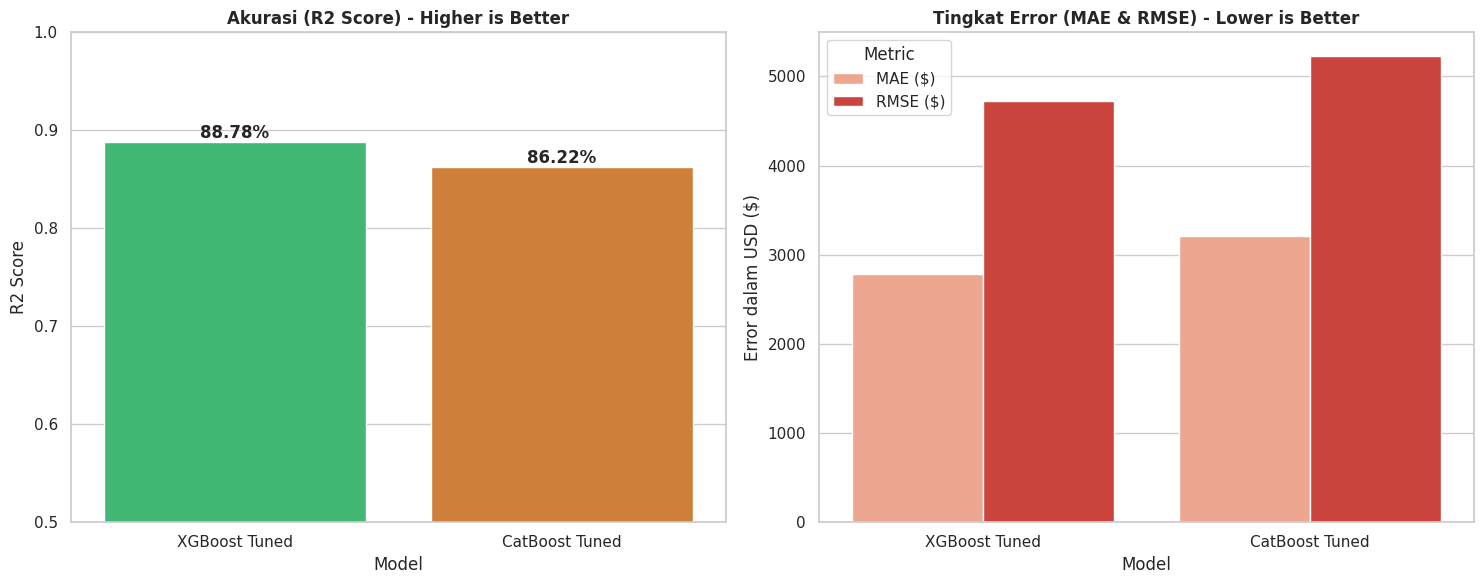

In [21]:
# ==============================================================================
# [CELL BARU] EVALUASI METRIC FINAL
# ==============================================================================
# Tujuan: Menampilkan tabel perbandingan detail (MAE, RMSE, R2)
# khusus untuk model hasil tuning (XGBoost Tuned & CatBoost Tuned).
# ==============================================================================

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("📊 MENGEVALUASI MODEL HASIL TUNING...")
print("="*60)

results = []

# ------------------------------------------------------------------------------
# 1. EVALUASI XGBOOST TUNED
# ------------------------------------------------------------------------------
if 'best_xgb' in locals():
    # Gunakan data test yang sesuai (Scaled atau Biasa)
    target_X = X_test_scaled if 'X_test_scaled' in locals() else X_test

    y_pred_xgb = best_xgb.predict(target_X)

    r2_xgb = r2_score(y_test, y_pred_xgb)
    mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
    rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

    results.append({
        'Model': 'XGBoost Tuned',
        'R2 Score': r2_xgb,
        'MAE ($)': mae_xgb,
        'RMSE ($)': rmse_xgb
    })
    print("✅ XGBoost Tuned berhasil dinilai.")
else:
    print("⚠️ XGBoost Tuned ('best_xgb') tidak ditemukan. Jalankan cell tuning dulu.")

# ------------------------------------------------------------------------------
# 2. EVALUASI CATBOOST TUNED
# ------------------------------------------------------------------------------
if 'best_cat' in locals():
    # CatBoost biasanya performa bagus di data original (unscaled), tapi cek ketersediaan
    target_X_cat = X_test if 'X_test' in locals() else X_test_scaled

    y_pred_cat = best_cat.predict(target_X_cat)

    r2_cat = r2_score(y_test, y_pred_cat)
    mae_cat = mean_absolute_error(y_test, y_pred_cat)
    rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))

    results.append({
        'Model': 'CatBoost Tuned',
        'R2 Score': r2_cat,
        'MAE ($)': mae_cat,
        'RMSE ($)': rmse_cat
    })
    print("✅ CatBoost Tuned berhasil dinilai.")
else:
    print("⚠️ CatBoost Tuned ('best_cat') tidak ditemukan. Jalankan cell tuning dulu.")

# ------------------------------------------------------------------------------
# 3. TAMPILKAN TABEL PERBANDINGAN
# ------------------------------------------------------------------------------
if len(results) > 0:
    print("\n" + "="*60)
    print("🏆 RAPOR AKHIR: PERBANDINGAN METRIK ERROR")
    print("="*60)

    df_results = pd.DataFrame(results)

    # Format angka agar cantik (R2 4 desimal, Harga pakai koma & $)
    pd.options.display.float_format = '{:,.4f}'.format

    # Tampilkan DataFrame
    # Kita buat format khusus untuk kolom uang agar ada '$'
    df_display = df_results.copy()
    df_display['R2 Score'] = df_display['R2 Score'].map('{:.2%}'.format)
    df_display['MAE ($)'] = df_display['MAE ($)'].map('${:,.2f}'.format)
    df_display['RMSE ($)'] = df_display['RMSE ($)'].map('${:,.2f}'.format)

    display(df_display)

    # --- Visualisasi Metric (Bar Chart Grouped) ---
    # Kita melt dataframe biar mudah di-plot
    df_melt = df_results.melt(id_vars="Model", var_name="Metric", value_name="Value")

    # Pisahkan R2 (Skala 0-1) dengan Error (Skala Ribuan) biar grafiknya gak jomplang
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Chart 1: R2 Score (Makin Tinggi Makin Bagus)
    sns.barplot(data=df_results, x='Model', y='R2 Score', palette=['#2ecc71', '#e67e22'], ax=axes[0])
    axes[0].set_title("Akurasi (R2 Score) - Higher is Better", fontweight='bold')
    axes[0].set_ylim(0.5, 1.0)
    for p in axes[0].patches:
        axes[0].annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom', fontweight='bold')

    # Chart 2: MAE & RMSE (Makin Rendah Makin Bagus)
    df_error = df_melt[df_melt['Metric'].isin(['MAE ($)', 'RMSE ($)'])]
    sns.barplot(data=df_error, x='Model', y='Value', hue='Metric', palette='Reds', ax=axes[1])
    axes[1].set_title("Tingkat Error (MAE & RMSE) - Lower is Better", fontweight='bold')
    axes[1].set_ylabel("Error dalam USD ($)")

    plt.tight_layout()
    plt.show()

else:
    print("\n❌ Tidak ada model yang bisa dievaluasi.")

In [20]:
# ==============================================================================
# [CELL TERAKHIR] SAVE ASSETS
# ==============================================================================

import joblib

print("💾 MENYIMPAN HASIL...")

# 1. Simpan Model
if 'final_model_winner' in locals():
    joblib.dump(final_model_winner, 'model_final.pkl')
    print("✅ Model Pemenang berhasil disimpan: 'model_final.pkl'")
elif 'best_xgb' in locals():
    joblib.dump(best_xgb, 'model_final.pkl')
    print("✅ XGBoost Tuned disimpan (Backup).")
else:
    print("❌ ERROR: Tidak ada model yang ditemukan.")

# 2. Simpan Kolom & Scaler (Penting untuk deployment)
try:
    cols = list(X_train.columns) if hasattr(X_train, 'columns') else [f"col_{i}" for i in range(X_train.shape[1])]
    joblib.dump(cols, 'model_columns.pkl')
    print("✅ Kolom Data tersimpan.")

    if 'scaler' in locals():
        joblib.dump(scaler, 'scaler.pkl')
        print("✅ Scaler tersimpan.")

    # Simpan Reference Data untuk Dropdown (ambil dari df_clean)
    ref_df = df_clean if 'df_clean' in locals() else df
    ref_data = {
        'manufacturer': sorted(ref_df['manufacturer'].astype(str).unique().tolist()),
        'fuel': sorted(ref_df['fuel'].astype(str).unique().tolist()),
        'transmission': sorted(ref_df['transmission'].astype(str).unique().tolist()),
    }
    joblib.dump(ref_data, 'reference_data.pkl')
    print("✅ Data Referensi tersimpan.")

except Exception as e:
    print(f"⚠️ Warning pada penyimpanan aset pendukung: {e}")

print("\n📂 Silakan download file .pkl di menu Files sebelah kiri.")

💾 MENYIMPAN HASIL...
✅ Model Pemenang berhasil disimpan: 'model_final.pkl'
✅ Kolom Data tersimpan.
✅ Scaler tersimpan.
✅ Data Referensi tersimpan.

📂 Silakan download file .pkl di menu Files sebelah kiri.
